### Mestrado Profissional em Computação Aplicada

#### **Disciplina**: Redes Neurais Artificiais 
####  **Professor**: Dr. Francisco de Assis Boldt
#### **Aluno**: Adriel Monti De Nardi

------



### Trabalho 02: Perceptron Multiclasse

Para concluir a atividade proposta devemos implementar uma Rede Neural rasa para classificação de uma base multiclasse.




#Função Geradataset , Plotadataset e Plota Hiperplano


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)


#Funções de Custo


In [26]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))


class Adaline():
  def __init__(self):
    self.preactivated = True
  @staticmethod
  def erro(y,ypred):
    return y - ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum((1 - Adaline.erro(y,ypred))**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(Adaline.erro(y,ypred),X)

#Gerando dataset de Teste e Treino em uma base Binária

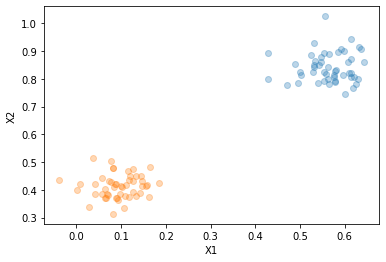

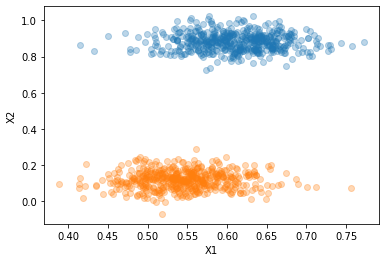

In [27]:
#Treinando base binária
Xbi,ybi = geradataset(100,2)
plotadataset(Xbi,ybi)
plt.show()
ybin = label_binarize(ybi,classes=list(set(ybi)))*2-1

print()

#testando base binária
Xbite,ybite = geradataset(1000,2)
plotadataset(Xbite,ybite)
plt.show()
ybin = label_binarize(ybite,classes=list(set(ybite)))*2-1

#Gerando dataset de Teste e Treino em uma base Multiclasse (4 classes)

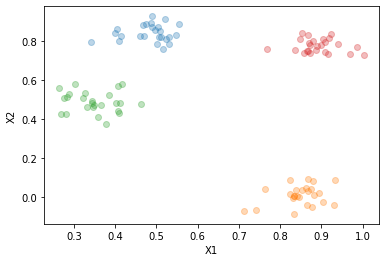

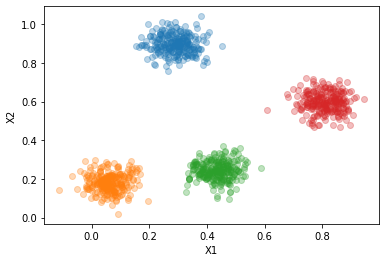

In [28]:
#Treinando base Muticlasse
Xmulti,ymulti = geradataset(100,4)
plotadataset(Xmulti,ymulti)
plt.show()
ybin = label_binarize(ymulti,classes=list(set(ymulti)))*2-1

print()

#Testando base Muticlasse
Xmultite,ymultite = geradataset(1000,4)
plotadataset(Xmultite,ymultite)
plt.show()
ybin = label_binarize(ymultite,classes=list(set(ymultite)))*2-1

#Perceptron Multiclasse

In [44]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron(), alpha=0.1):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 200
        self.custo = custo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1,1, size=Xb.shape[1])
        for _ in range(self.maxiter):
          ypred = self.predict(X)
          custo = self.custo.custo(y,ypred)
          if custo == 0:
            break
          self.w = self.w + self.alpha*self.custo.gradiente(y,ypred,Xb)
      

    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


In [45]:
perceptron = Perceptron()
perceptron.fit(Xbi, ybi)
ypred = perceptron.predict(Xbite)
print(sum(ybite == ypred)/len(ybite))
print(perceptron.w[1:], perceptron.w[0])


perceptron2 = Perceptron()
perceptron2.fit(Xmulti, ymulti)
ypred2 = perceptron2.predict(Xmultite)
print(sum(ymultite == ypred2)/len(ymultite))
print(perceptron2.w[1:], perceptron2.w[0])

0.5
[-3.45398239 -0.34587383] 9.198409576683572
0.25
[826.69177425 598.28558966] 1000.5626755829738


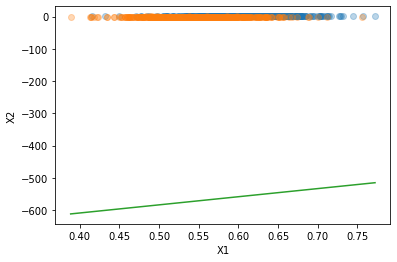

IndexError: ignored

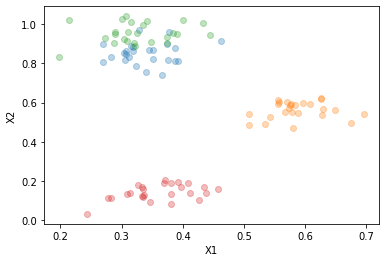

In [41]:
#teste exemplo binario
plotadataset(Xbite,ybite)
plotahiperplano(perceptron.w[1:], perceptron.w[0], min(Xbite[:,0]), max(Xbite[:,0]))
plt.show()


#teste exemplo multiclasse
plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
